# Dask Delayed

In this section we parallelize for-loop style code with Dask Delayed. This approach is more flexible and more manual than automatic approaches like Dask Dataframe. It is commonly useful to parallelize existing codebases, or to build tools like Dask Dataframe.

In [1]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [2]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 1.97 ms, sys: 273 µs, total: 2.25 ms
Wall time: 3 s


# Parallelize with `dask.delayed`

In [3]:
import dask

In [4]:
%%time

x = dask.delayed(inc)(1)
y = dask.delayed(inc)(2)
z = dask.delayed(add)(x, y)

CPU times: user 684 µs, sys: 91 µs, total: 775 µs
Wall time: 564 µs


In [5]:
%%time

z.compute()

CPU times: user 12.6 ms, sys: 0 ns, total: 12.6 ms
Wall time: 2.01 s


5

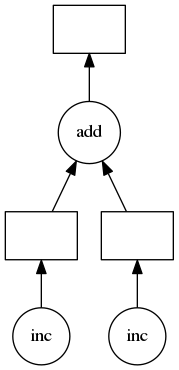

In [7]:
z.visualize()

# For Loop Parallelization

In [9]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [10]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: user 12.6 ms, sys: 0 ns, total: 12.6 ms
Wall time: 8.01 s


In [11]:
total

44

In [14]:
results = []
for x in data:
    y = dask.delayed(inc)(x)
    results.append(y)
    
total = dask.delayed(sum)(results)

In [15]:
%time total.compute()

CPU times: user 7.8 ms, sys: 554 µs, total: 8.35 ms
Wall time: 1 s


44

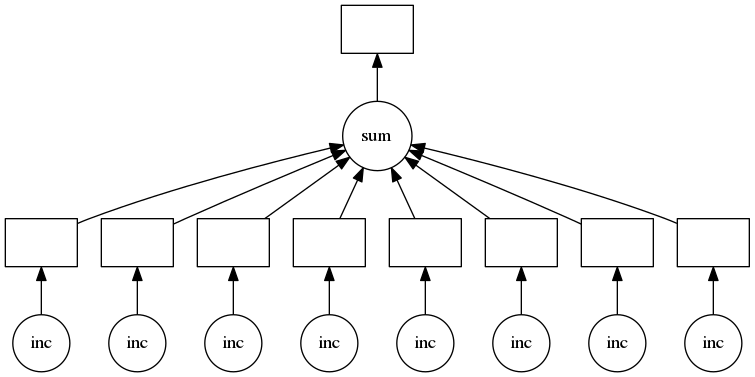

In [16]:
total.visualize()

## Control Flow

In [17]:
def inc(x):
    sleep(1)
    return x + 1

def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [18]:
%%time
# Sequential code

results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)
    
total = sum(results)
print(total)

90
CPU times: user 11.8 ms, sys: 449 µs, total: 12.3 ms
Wall time: 10 s


In [19]:
results = []
for x in data:
    if is_even(x):
        y = dask.delayed(double)(x)
    else:
        y = dask.delayed(inc)(x)
    results.append(y)
    
total = dask.delayed(sum)(results)

In [20]:
%time total.compute()

CPU times: user 11.2 ms, sys: 0 ns, total: 11.2 ms
Wall time: 2.01 s


90

**we want is_even(x) to run at real time, not a delayed object!!!** 

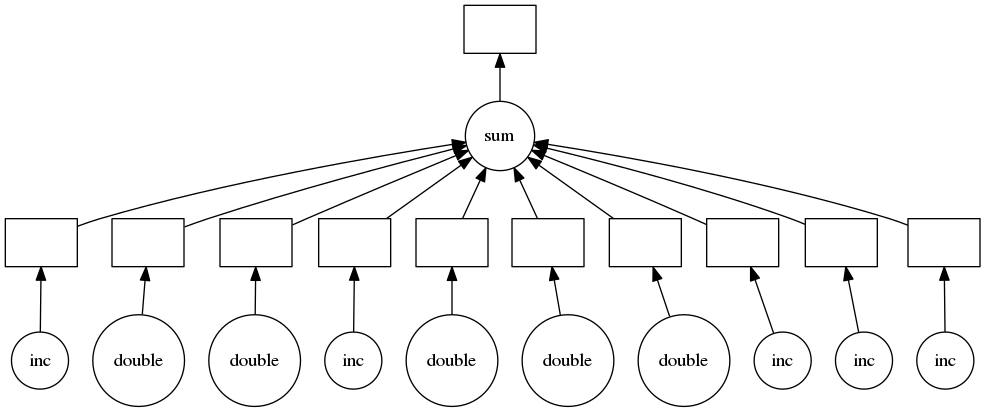

In [21]:
total.visualize()